In [1]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN 알고리즘 모델 클래스
from sklearn.tree import DecisionTreeClassifier # Tree 알고리즘 모델 클래스
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

In [2]:
diabetes = pd.read_csv("merge_data1/diabetes.csv")
food = pd.read_csv("merge_data1/3년간 성별별 권장섭취량 기준 차이비율.csv")
hypertension = pd.read_csv("merge_data1/hypertension_data.csv")
stroke = pd.read_csv("merge_data1/stroke_data.csv")
energe = pd.read_csv("data/경기도 화성시_만성질환관리 프로그램 통계(영양)_20191231.csv", encoding='euc-kr')

In [3]:
gender = food.dropna()
gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 39
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  38 non-null     int64  
 1   성별          38 non-null     object 
 2   영양소         38 non-null     object 
 3   비율(%)_2019  38 non-null     float64
 4   비율(%)_2020  38 non-null     float64
 5   비율(%)_2021  38 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.1+ KB


In [4]:
# 임신횟수, 포도당, 혈압, 피부두께, 인슐린, bmi, 당뇨혈통, 나이, 당뇨여부
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
hypertension.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
stroke.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [7]:
food1 = food.dropna()[['성별', '영양소', '비율(%)_2019', '비율(%)_2020', '비율(%)_2021']]
food1[food1['비율(%)_2021']<0][['성별', '영양소']][food1['성별']=='남자']['영양소']
food_male = food1[food1['비율(%)_2021']<0][['성별', '영양소']][food1['성별']=='여자']['영양소']
food_female = food1[food1['비율(%)_2021']<0][['성별', '영양소']][food1['성별']=='남자']['영양소']
food_list = food1[food1['비율(%)_2021']<0][['성별', '영양소']]
food_male.values
food_female.values

C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\338896379.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  food1[food1['비율(%)_2021']<0][['성별', '영양소']][food1['성별']=='남자']['영양소']
C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\338896379.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  food_male = food1[food1['비율(%)_2021']<0][['성별', '영양소']][food1['성별']=='여자']['영양소']
C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\338896379.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  food_female = food1[food1['비율(%)_2021']<0][['성별', '영양소']][food1['성별']=='남자']['영양소']


array(['에너지', '칼슘', '칼륨', '마그네슘', '비타민A(RAE)', '비타민D', '비타민E', '나이아신',
       '엽산', '비타민C'], dtype=object)

In [8]:
energe.head()

,연령대,성별,질환,열량(kcal),단백질(g),지질(g),당질(g),식이섬유(g),콜레스테롤(mg),나트륨(mg),칼륨(mg),칼슘(mg),열량(kcal).1,단백질(g).1,지질(g).1,당질(g).1,식이섬유(g).1,콜레스테롤(mg).1,나트륨(mg).1,칼륨(mg).1,칼슘(mg).1,식이섬유(g).2,콜레스테롤(mg).2,나트륨(mg).2,칼륨(mg).2,칼슘(mg).2
0,30~34세,남,고혈압,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0
1,30~34세,남,당뇨,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0
2,30~34세,남,이상지질,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0
3,30~34세,남,비만,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0
4,30~34세,녀,고혈압,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0,0,0


In [9]:
df1 = energe[['성별', '질환', '열량(kcal)', '단백질(g)', '지질(g)', '당질(g)', '식이섬유(g)',
       '콜레스테롤(mg)', '나트륨(mg)', '칼륨(mg)', '칼슘(mg)']]
df1

,성별,질환,열량(kcal),단백질(g),지질(g),당질(g),식이섬유(g),콜레스테롤(mg),나트륨(mg),칼륨(mg),칼슘(mg)
0,남,고혈압,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00
1,남,당뇨,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00
2,남,이상지질,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00
3,남,비만,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00
4,녀,고혈압,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00
5,녀,당뇨,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00
6,녀,이상지질,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00
7,녀,비만,"1,142.85",49.86,37.07,151.04,14.57,270.82,"2,001.48","1,884.81",374.23
8,남,고혈압,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00
9,남,당뇨,0,0.00,0.00,0.00,0.00,0.00,0,0,0.00


In [10]:
df2 = df1.drop(df1[df1['열량(kcal)'] == '0'].index)

In [11]:
df2.head()

,성별,질환,열량(kcal),단백질(g),지질(g),당질(g),식이섬유(g),콜레스테롤(mg),나트륨(mg),칼륨(mg),칼슘(mg)
7,녀,비만,"1,142.85",49.86,37.07,151.04,14.57,270.82,"2,001.48","1,884.81",374.23
12,녀,고혈압,"1,458.20",64.36,54.58,174.03,15.15,419.53,"2,650.42","2,051.56",453.10
14,녀,이상지질,"1,304.21",56.28,39.16,187.13,15.41,309.38,"3,797.86","1,858.15",289.35
15,녀,비만,"1,315.16",58.11,51.63,154.32,14.38,367.55,"2,421.72","2,012.25",426.21
18,남,이상지질,"2,013.63",80.65,63.79,281.09,23.95,237.60,"4,457.34","2,925.86",565.10


In [12]:
df_concatSex = pd.get_dummies(df2['성별'], dtype=int)
dum1 = pd.get_dummies(df2['질환'])
data_dum = dum1.astype(int)
df3 = pd.concat([df2, df_concatSex], axis=1)
df5 = pd.concat([df3, data_dum], axis=1)
df5.to_csv('example.csv', index=False)
df5['콜레스테롤(kg)'] = df5['콜레스테롤(mg)'] / 1000000
df5['칼슘(kg)'] = df5['칼슘(mg)'] / 1000000
df5['지질(kcal)'] = df5['지질(g)'] * 9 / 1000
df5['당질(kcal)'] = df5['당질(g)'] * 4 / 1000
df5['식이섬유(kcal)'] = df5['식이섬유(g)'] * 2 / 1000
df5['단백질(kcal)'] = df5['단백질(g)'] * 4 / 1000
df5['열량(kcal)'] = df5['열량(kcal)'].str.replace(',', '').astype(float)
df5['나트륨(mg)'] = df5['나트륨(mg)'].str.replace(',', '').astype(float)
df5['칼륨(mg)'] = df5['칼륨(mg)'].str.replace(',', '').astype(float)
df5['나트륨(kg)'] = df5['나트륨(mg)'].astype(float) / 1000000
df5['칼륨(kg)'] = df5['칼륨(mg)'].astype(float) / 1000000

In [13]:
X=df5[['열량(kcal)', '단백질(g)', '지질(g)', '당질(g)', '식이섬유(g)', '콜레스테롤(mg)', '나트륨(mg)'
  ,'칼륨(mg)', '칼슘(mg)', '남', '녀']]
y = df5[['고혈압', '당뇨', '비만', '이상지질']]

In [14]:
model1 = RandomForestRegressor()

In [15]:
X

,열량(kcal),단백질(g),지질(g),당질(g),식이섬유(g),콜레스테롤(mg),나트륨(mg),칼륨(mg),칼슘(mg),남,녀
7,1142.85,49.86,37.07,151.04,14.57,270.82,2001.48,1884.81,374.23,0,1
12,1458.20,64.36,54.58,174.03,15.15,419.53,2650.42,2051.56,453.10,0,1
14,1304.21,56.28,39.16,187.13,15.41,309.38,3797.86,1858.15,289.35,0,1
15,1315.16,58.11,51.63,154.32,14.38,367.55,2421.72,2012.25,426.21,0,1
18,2013.63,80.65,63.79,281.09,23.95,237.60,4457.34,2925.86,565.10,1,0
20,1277.36,67.97,44.50,166.28,16.01,372.09,2398.33,2034.21,393.02,0,1
21,1196.27,53.53,35.97,164.98,18.98,375.36,2069.82,2569.68,382.05,0,1
23,1596.89,72.58,56.55,198.17,16.29,358.97,3233.73,2377.22,458.80,0,1
24,1652.38,104.59,56.42,178.39,19.89,949.84,3013.62,3276.15,541.45,1,0
25,799.42,37.28,22.50,110.44,12.33,375.68,1075.97,1531.57,256.61,1,0


In [16]:
y

,고혈압,당뇨,비만,이상지질
7,0,0,1,0
12,1,0,0,0
14,0,0,0,1
15,0,0,1,0
18,0,0,0,1
20,1,0,0,0
21,0,1,0,0
23,0,0,1,0
24,1,0,0,0
25,0,1,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

In [18]:
model1.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
pre = model1.predict(X_test)

In [20]:
pre

array([[0.21, 0.21, 0.11, 0.47],
       [0.17, 0.35, 0.12, 0.36],
       [0.3 , 0.49, 0.01, 0.2 ],
       [0.08, 0.54, 0.18, 0.2 ],
       [0.37, 0.33, 0.06, 0.24],
       [0.  , 0.26, 0.2 , 0.54],
       [0.31, 0.43, 0.08, 0.18],
       [0.19, 0.55, 0.22, 0.04],
       [0.29, 0.08, 0.24, 0.39],
       [0.09, 0.45, 0.17, 0.29],
       [0.47, 0.32, 0.  , 0.21],
       [0.25, 0.16, 0.13, 0.46],
       [0.57, 0.09, 0.15, 0.19]])

In [21]:
from sklearn.metrics import mean_squared_error

y_true = y_test
y_pred = pre

mse = mean_squared_error(y_true, y_pred)
mse

0.2056

In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
r2

-0.16270342171717173

In [23]:
df_heal = pd.read_csv("./merge_data1/국민건강보험공단_건강검진정보_20221231 (1).CSV", encoding='euc-kr')

In [24]:
df_heal

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세 단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증율,제3대구치(사랑니)이상,치석
0,2022,3008666,41,1,11,160,80,100.0,0.9,1.0,1.0,1.0,129.0,77.0,146.0,NaN,NaN,NaN,NaN,16.4,2.0,0.6,45.0,47.0,108.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2022,2204972,46,2,9,150,55,70.0,0.9,1.2,1.0,1.0,140.0,90.0,83.0,NaN,NaN,NaN,NaN,14.7,1.0,0.9,16.0,13.0,19.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2022,3210310,48,1,10,180,70,89.0,1.0,1.5,1.0,1.0,122.0,74.0,110.0,NaN,NaN,NaN,NaN,14.7,1.0,0.8,11.0,14.0,19.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2022,206345,26,2,14,150,50,68.0,0.7,0.8,1.0,1.0,120.0,80.0,70.0,125.0,99.0,56.0,49.0,13.9,1.0,0.6,35.0,38.0,21.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,2022,1180297,41,2,10,165,55,69.0,0.7,1.0,1.0,1.0,113.0,59.0,101.0,NaN,NaN,NaN,NaN,12.6,1.0,0.6,18.0,15.0,12.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2022,2017737,41,1,14,170,65,90.5,1.0,1.0,1.0,1.0,118.0,79.0,110.0,NaN,NaN,NaN,NaN,14.6,1.0,0.8,20.0,11.0,36.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
999996,2022,4211435,41,1,11,175,55,72.0,0.8,0.7,1.0,1.0,118.0,80.0,102.0,NaN,NaN,NaN,NaN,13.7,1.0,0.7,24.0,19.0,15.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999997,2022,4710877,44,2,14,150,50,89.0,1.0,1.0,1.0,1.0,104.0,67.0,97.0,196.0,99.0,61.0,115.0,13.6,3.0,0.8,29.0,17.0,33.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,2022,1622994,29,1,17,155,50,67.0,0.7,0.5,2.0,2.0,119.0,68.0,85.0,120.0,31.0,47.0,67.0,8.7,1.0,1.0,30.0,8.0,18.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0


In [25]:
df_sl = df_heal[["가입자일련번호", '성별', '연령대코드(5세 단위)', 
 '신장(5cm단위)', '체중(5kg단위)', 
 '허리둘레', '시력(좌)', '시력(좌)', '시력(우)', 
 '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', 
 '식전혈당(공복혈당)', '요단백', '흡연상태', '음주여부', '총콜레스테롤']]

In [26]:
df_sl

,가입자일련번호,성별,연령대코드(5세 단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,흡연상태,음주여부,총콜레스테롤
0,3008666,1,11,160,80,100.0,0.9,0.9,1.0,1.0,1.0,129.0,77.0,146.0,2.0,3.0,1.0,NaN
1,2204972,2,9,150,55,70.0,0.9,0.9,1.2,1.0,1.0,140.0,90.0,83.0,1.0,1.0,1.0,NaN
2,3210310,1,10,180,70,89.0,1.0,1.0,1.5,1.0,1.0,122.0,74.0,110.0,1.0,3.0,1.0,NaN
3,206345,2,14,150,50,68.0,0.7,0.7,0.8,1.0,1.0,120.0,80.0,70.0,1.0,1.0,0.0,125.0
4,1180297,2,10,165,55,69.0,0.7,0.7,1.0,1.0,1.0,113.0,59.0,101.0,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017737,1,14,170,65,90.5,1.0,1.0,1.0,1.0,1.0,118.0,79.0,110.0,1.0,3.0,1.0,NaN
999996,4211435,1,11,175,55,72.0,0.8,0.8,0.7,1.0,1.0,118.0,80.0,102.0,1.0,1.0,1.0,NaN
999997,4710877,2,14,150,50,89.0,1.0,1.0,1.0,1.0,1.0,104.0,67.0,97.0,3.0,1.0,1.0,196.0
999998,1622994,1,17,155,50,67.0,0.7,0.7,0.5,2.0,2.0,119.0,68.0,85.0,1.0,1.0,0.0,120.0


In [27]:
df_sl['bmi'] = df_sl['체중(5kg단위)']/ (df_sl['신장(5cm단위)']/100 * df_sl['신장(5cm단위)']/100)
df_sl['bmi'] = df_sl['bmi'].round(1)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\4284232555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sl['bmi'] = df_sl['체중(5kg단위)']/ (df_sl['신장(5cm단위)']/100 * df_sl['신장(5cm단위)']/100)
C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\4284232555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sl['bmi'] = df_sl['bmi'].round(1)


In [28]:
df_sl.head()

,가입자일련번호,성별,연령대코드(5세 단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,흡연상태,음주여부,총콜레스테롤,bmi
0,3008666,1,11,160,80,100.0,0.9,0.9,1.0,1.0,1.0,129.0,77.0,146.0,2.0,3.0,1.0,NaN,31.2
1,2204972,2,9,150,55,70.0,0.9,0.9,1.2,1.0,1.0,140.0,90.0,83.0,1.0,1.0,1.0,NaN,24.4
2,3210310,1,10,180,70,89.0,1.0,1.0,1.5,1.0,1.0,122.0,74.0,110.0,1.0,3.0,1.0,NaN,21.6
3,206345,2,14,150,50,68.0,0.7,0.7,0.8,1.0,1.0,120.0,80.0,70.0,1.0,1.0,0.0,125.0,22.2
4,1180297,2,10,165,55,69.0,0.7,0.7,1.0,1.0,1.0,113.0,59.0,101.0,1.0,1.0,0.0,NaN,20.2


In [29]:
df = df_sl.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410573 entries, 3 to 999999
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   가입자일련번호       410573 non-null  int64  
 1   성별            410573 non-null  int64  
 2   연령대코드(5세 단위)  410573 non-null  int64  
 3   신장(5cm단위)     410573 non-null  int64  
 4   체중(5kg단위)     410573 non-null  int64  
 5   허리둘레          410573 non-null  float64
 6   시력(좌)         410573 non-null  float64
 7   시력(좌)         410573 non-null  float64
 8   시력(우)         410573 non-null  float64
 9   청력(좌)         410573 non-null  float64
 10  청력(우)         410573 non-null  float64
 11  수축기혈압         410573 non-null  float64
 12  이완기혈압         410573 non-null  float64
 13  식전혈당(공복혈당)    410573 non-null  float64
 14  요단백           410573 non-null  float64
 15  흡연상태          410573 non-null  float64
 16  음주여부          410573 non-null  float64
 17  총콜레스테롤        410573 non-null  float64
 18  bmi 

In [30]:
df_die = pd.read_csv("./merge_data1/diabetes.csv")
df_hyper = pd.read_csv("./merge_data1/hypertension_data.csv")
df_stroke = pd.read_csv("./merge_data1/stroke_data.csv")

In [31]:
df_hyper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [32]:
df_hyper.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df_die.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
df_die.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [36]:
df_stroke.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age'),
 Text(8.5, 0, 'Outcome')]

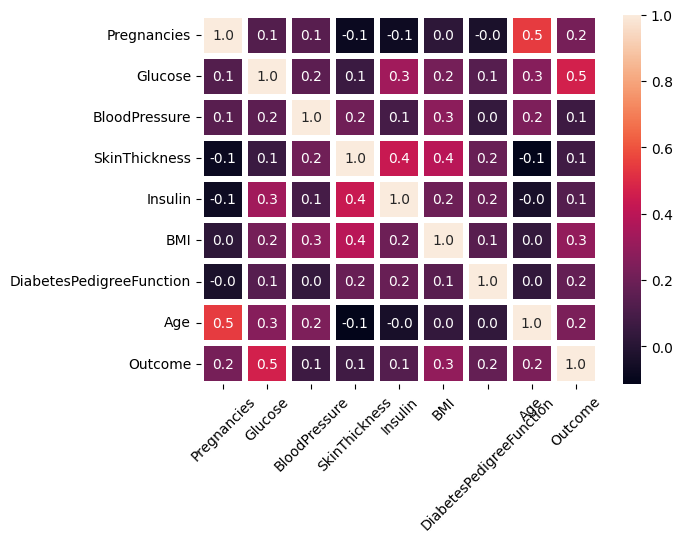

In [37]:
heatmap = sns.heatmap(df_die.corr(method='pearson'), annot=True, fmt=".1f", linewidths=3)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)

In [38]:
df_die1 = df_die[['Glucose', 'Outcome', 'BMI']]
df_die2 = df[['식전혈당(공복혈당)', 'bmi']]

In [39]:
df_hyper1 = df_hyper.dropna()

In [40]:
X2 = df_hyper1[['age', 'sex', 'trestbps', 'chol']]
y = df_hyper1['target']
X1 = df[['성별', '연령대코드(5세 단위)', '이완기혈압', '총콜레스테롤']]
X1.columns = ['age', 'sex', 'trestbps', 'chol']
X3 = X1[['age', 'sex', 'trestbps', 'chol']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=133)

In [42]:
model_test = KNeighborsClassifier()
model_test1 = KNeighborsClassifier()

In [43]:
model_test1.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
pre_test = model_test1.predict(X_test)

In [45]:
pre_hyper = model_test1.predict(X_test)

In [46]:
accuracy_score(pre_test, y_test)

0.9341519570222563

In [47]:
# 고혈압 데이터에 대한 정확도 분석

list_acc_train = []
list_acc_test = []
for i in range(100, 1, -5):
    model_re = KNeighborsClassifier(n_neighbors=i)
    model_re.fit(X_train, y_train)
    pre_train = model_re.predict(X_train)
    pre_test = model_re.predict(X_test)
    list_acc_train.append(accuracy_score(pre_train, y_train))
    list_acc_test.append(accuracy_score(pre_test, y_test))

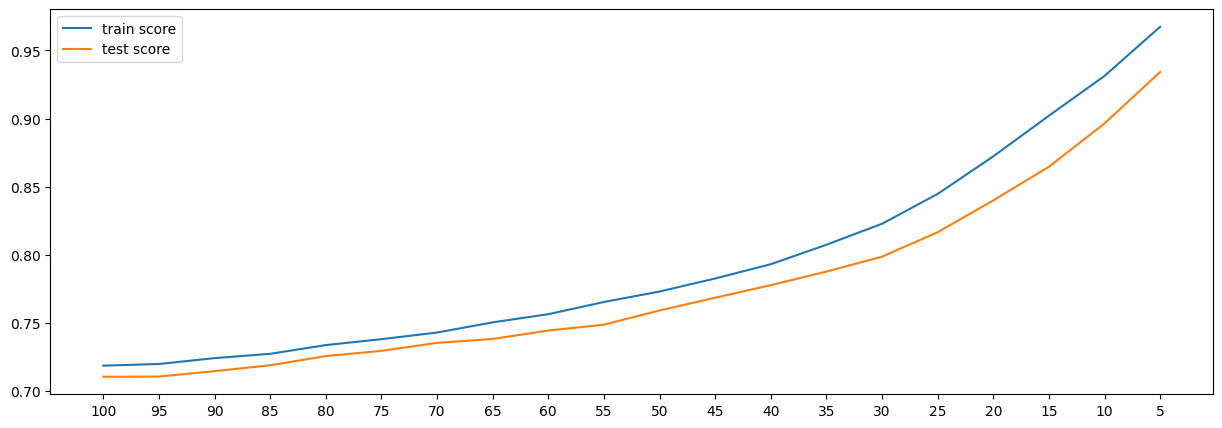

In [48]:
# 고혈압 결과 시각화

plt.figure(figsize=(15, 5))
plt.plot(range(20), list_acc_train, label="train score")
plt.plot(range(20), list_acc_test, label="test score")
plt.legend()
plt.xticks(range(20), range(100, 1, -5))
plt.show()

In [49]:
model_test.fit(X2,y)

KNeighborsClassifier()

In [50]:
df_die1

,Glucose,Outcome,BMI
0,148,1,33.6
1,85,0,26.6
2,183,1,23.3
3,89,0,28.1
4,137,1,43.1
...,...,...,...
763,101,0,32.9
764,122,0,36.8
765,121,0,26.2
766,126,1,30.1


In [51]:
df_die2

,식전혈당(공복혈당),bmi
3,70.0,22.2
9,142.0,25.7
11,81.0,27.1
12,104.0,22.2
14,124.0,27.7
...,...,...
999990,97.0,20.8
999992,93.0,28.9
999997,97.0,22.2
999998,85.0,20.8


In [52]:
df_die2.columns = ['Glucose', 'BMI']

In [53]:
X = df_die1[['Glucose', 'BMI']]
y = df_die1['Outcome']

In [54]:
X_train_die, X_test_die, y_train_die, y_test_die = train_test_split(X,y, random_state=112)

In [55]:
model2 = KNeighborsClassifier()

In [56]:
model2.fit(X,y)

KNeighborsClassifier()

In [57]:
pre_die = model2.predict(df_die2)

In [58]:
pre_die

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
# 당뇨병 데이터 확인


list_test_die = []
list_train_die = []

for i in range(100, 1, -5):
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(X_train_die, y_train_die)
    pre_test = m.predict(X_test_die)
    pre_train = m.predict(X_train_die)
    list_test_die.append(accuracy_score(pre_test, y_test_die))
    list_train_die.append(accuracy_score(pre_train, y_train_die))

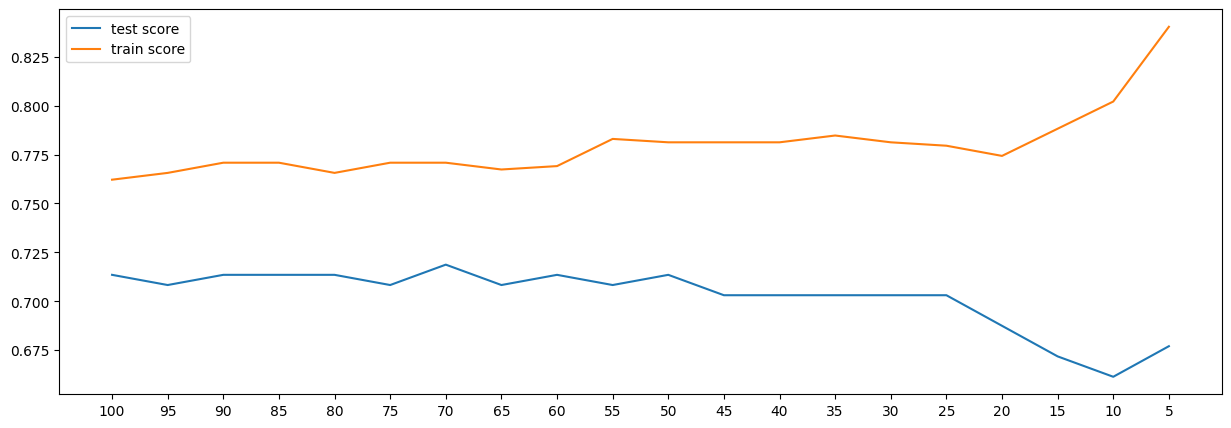

In [60]:
plt.figure(figsize=(15,5))
plt.plot(range(20), list_test_die, label='test score')
plt.plot(range(20), list_train_die, label="train score")
plt.legend()
plt.xticks(range(20), range(100, 1, -5))
plt.show()

In [61]:
df_stroke = df_stroke.dropna()

[Text(0.5, 0, 'sex'),
 Text(1.5, 0, 'age'),
 Text(2.5, 0, 'hypertension'),
 Text(3.5, 0, 'heart_disease'),
 Text(4.5, 0, 'ever_married'),
 Text(5.5, 0, 'work_type'),
 Text(6.5, 0, 'Residence_type'),
 Text(7.5, 0, 'avg_glucose_level'),
 Text(8.5, 0, 'bmi'),
 Text(9.5, 0, 'smoking_status'),
 Text(10.5, 0, 'stroke')]

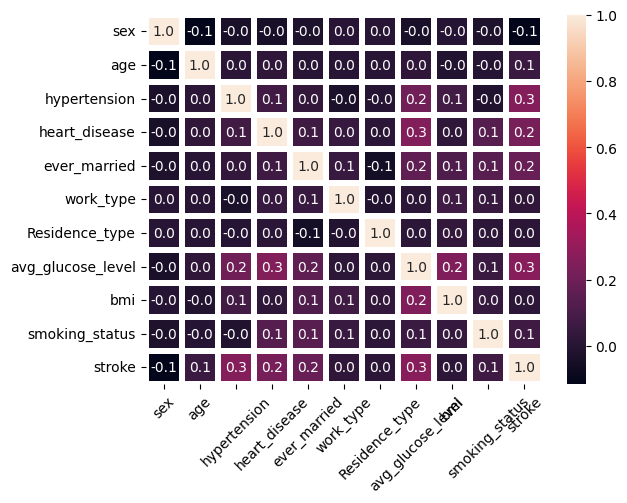

In [62]:
heatmap = sns.heatmap(df_stroke.corr(method='pearson'), annot=True, fmt=".1f", linewidths=3)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)

In [63]:
pre_hyper = model2.predict(df_die2)

In [64]:
df['성별-1'] = df['성별'] - 1
df['흡연상태-1'] = df['흡연상태']-1
df['hypertension'] = pre_hyper

C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\2839685289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['성별-1'] = df['성별'] - 1
C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\2839685289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['흡연상태-1'] = df['흡연상태']-1
C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\2839685289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [65]:
df

,가입자일련번호,성별,연령대코드(5세 단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,흡연상태,음주여부,총콜레스테롤,bmi,성별-1,흡연상태-1,hypertension
3,206345,2,14,150,50,68.0,0.7,0.7,0.8,1.0,1.0,120.0,80.0,70.0,1.0,1.0,0.0,125.0,22.2,1,0.0,0
9,4408125,1,17,165,70,98.0,0.6,0.6,0.5,1.0,1.0,133.0,75.0,142.0,1.0,1.0,1.0,129.0,25.7,0,0.0,0
11,1244970,2,9,155,65,79.0,1.2,1.2,1.0,1.0,1.0,122.0,75.0,81.0,1.0,1.0,1.0,260.0,27.1,1,0.0,0
12,154066,2,10,150,50,73.0,0.9,0.9,1.2,1.0,1.0,110.0,72.0,104.0,1.0,1.0,1.0,234.0,22.2,1,0.0,0
14,4588174,1,12,170,80,94.0,1.2,1.2,1.2,1.0,1.0,158.0,90.0,124.0,1.0,2.0,1.0,276.0,27.7,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,3103290,2,10,155,50,68.0,0.9,0.9,1.0,1.0,1.0,120.0,80.0,97.0,1.0,1.0,0.0,217.0,20.8,1,0.0,0
999992,623733,2,12,150,65,86.0,1.2,1.2,1.0,1.0,1.0,146.0,91.0,93.0,1.0,1.0,1.0,235.0,28.9,1,0.0,0
999997,4710877,2,14,150,50,89.0,1.0,1.0,1.0,1.0,1.0,104.0,67.0,97.0,3.0,1.0,1.0,196.0,22.2,1,0.0,0
999998,1622994,1,17,155,50,67.0,0.7,0.7,0.5,2.0,2.0,119.0,68.0,85.0,1.0,1.0,0.0,120.0,20.8,0,0.0,0


In [164]:
df_stroke[['hypertension', 'bmi', 'smoking_status', 'stroke']]
df[['hypertension', 'bmi', '흡연상태-1']]

,hypertension,bmi,흡연상태-1
3,0,22.2,0.0
9,0,25.7,0.0
11,0,27.1,0.0
12,0,22.2,0.0
14,1,27.7,1.0
...,...,...,...
999990,0,20.8,0.0
999992,0,28.9,0.0
999997,0,22.2,0.0
999998,0,20.8,0.0


In [166]:
X = df_stroke[['hypertension', 'bmi', 'smoking_status']]
y = df_stroke['stroke']
df111 = df[['hypertension', 'bmi', '흡연상태-1']]
df111.columns = ['hypertension', 'bmi', 'smoking_status']

In [167]:
model2.fit(X,y)

KNeighborsClassifier()

In [168]:
X_str_train, X_str_test, y_str_train, y_str_test = train_test_split(X,y, random_state=132)

In [169]:
pre_stroke = model2.predict(df111)

In [170]:
# 뇌졸중 정확도 테스트
list_train_str = []
list_test_str = []

for i in range(100, 1, -5):
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(X_str_train, y_str_train)
    pre_str_train = m.predict(X_str_train)
    pre_str_test = m.predict(X_str_test)
    list_train_str.append(accuracy_score(pre_str_train, y_str_train))
    list_test_str.append(accuracy_score(pre_str_test, y_str_test))

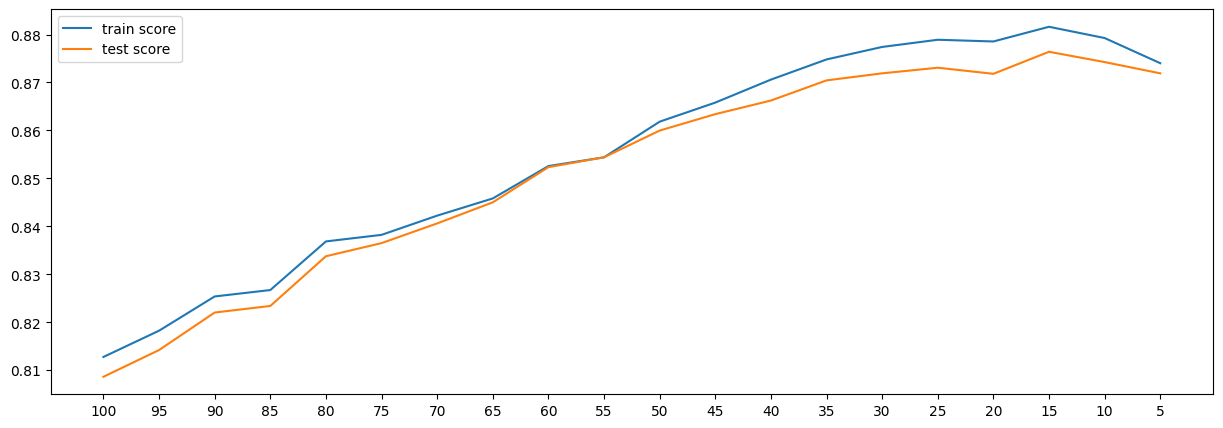

In [171]:
plt.figure(figsize=(15,5))
plt.plot(range(20), list_train_str, label="train score")
plt.plot(range(20), list_test_str, label="test score")
plt.legend()
plt.xticks(range(20), range(100, 1, -5))
plt.show()

In [73]:
df_heart = pd.read_csv("./merge_data1/heart_failure_clinical_records_dataset.csv")

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'anaemia'),
 Text(2.5, 0, 'creatinine_phosphokinase'),
 Text(3.5, 0, 'diabetes'),
 Text(4.5, 0, 'ejection_fraction'),
 Text(5.5, 0, 'high_blood_pressure'),
 Text(6.5, 0, 'platelets'),
 Text(7.5, 0, 'serum_creatinine'),
 Text(8.5, 0, 'serum_sodium'),
 Text(9.5, 0, 'sex'),
 Text(10.5, 0, 'smoking'),
 Text(11.5, 0, 'time'),
 Text(12.5, 0, 'DEATH_EVENT')]

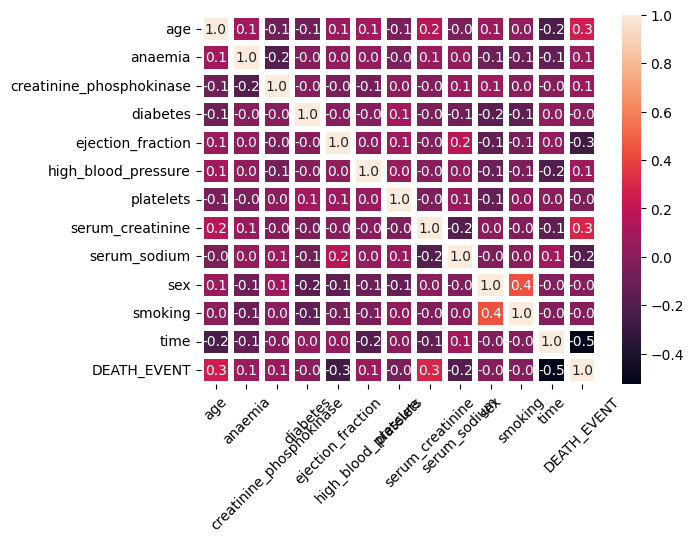

In [74]:
heatmap = sns.heatmap(df_heart.corr(method='pearson'), annot=True, fmt=".1f", linewidths=3)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)

In [75]:
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [76]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [77]:
df

,가입자일련번호,성별,연령대코드(5세 단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,흡연상태,음주여부,총콜레스테롤,bmi,성별-1,흡연상태-1,hypertension
3,206345,2,14,150,50,68.0,0.7,0.7,0.8,1.0,1.0,120.0,80.0,70.0,1.0,1.0,0.0,125.0,22.2,1,0.0,0
9,4408125,1,17,165,70,98.0,0.6,0.6,0.5,1.0,1.0,133.0,75.0,142.0,1.0,1.0,1.0,129.0,25.7,0,0.0,0
11,1244970,2,9,155,65,79.0,1.2,1.2,1.0,1.0,1.0,122.0,75.0,81.0,1.0,1.0,1.0,260.0,27.1,1,0.0,0
12,154066,2,10,150,50,73.0,0.9,0.9,1.2,1.0,1.0,110.0,72.0,104.0,1.0,1.0,1.0,234.0,22.2,1,0.0,0
14,4588174,1,12,170,80,94.0,1.2,1.2,1.2,1.0,1.0,158.0,90.0,124.0,1.0,2.0,1.0,276.0,27.7,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,3103290,2,10,155,50,68.0,0.9,0.9,1.0,1.0,1.0,120.0,80.0,97.0,1.0,1.0,0.0,217.0,20.8,1,0.0,0
999992,623733,2,12,150,65,86.0,1.2,1.2,1.0,1.0,1.0,146.0,91.0,93.0,1.0,1.0,1.0,235.0,28.9,1,0.0,0
999997,4710877,2,14,150,50,89.0,1.0,1.0,1.0,1.0,1.0,104.0,67.0,97.0,3.0,1.0,1.0,196.0,22.2,1,0.0,0
999998,1622994,1,17,155,50,67.0,0.7,0.7,0.5,2.0,2.0,119.0,68.0,85.0,1.0,1.0,0.0,120.0,20.8,0,0.0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410573 entries, 3 to 999999
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   가입자일련번호       410573 non-null  int64  
 1   성별            410573 non-null  int64  
 2   연령대코드(5세 단위)  410573 non-null  int64  
 3   신장(5cm단위)     410573 non-null  int64  
 4   체중(5kg단위)     410573 non-null  int64  
 5   허리둘레          410573 non-null  float64
 6   시력(좌)         410573 non-null  float64
 7   시력(좌)         410573 non-null  float64
 8   시력(우)         410573 non-null  float64
 9   청력(좌)         410573 non-null  float64
 10  청력(우)         410573 non-null  float64
 11  수축기혈압         410573 non-null  float64
 12  이완기혈압         410573 non-null  float64
 13  식전혈당(공복혈당)    410573 non-null  float64
 14  요단백           410573 non-null  float64
 15  흡연상태          410573 non-null  float64
 16  음주여부          410573 non-null  float64
 17  총콜레스테롤        410573 non-null  float64
 18  bmi 

In [79]:
df["diabetes"] = pre_die

C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\2945865927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diabetes"] = pre_die


In [80]:
df

,가입자일련번호,성별,연령대코드(5세 단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),요단백,흡연상태,음주여부,총콜레스테롤,bmi,성별-1,흡연상태-1,hypertension,diabetes
3,206345,2,14,150,50,68.0,0.7,0.7,0.8,1.0,1.0,120.0,80.0,70.0,1.0,1.0,0.0,125.0,22.2,1,0.0,0,0
9,4408125,1,17,165,70,98.0,0.6,0.6,0.5,1.0,1.0,133.0,75.0,142.0,1.0,1.0,1.0,129.0,25.7,0,0.0,0,0
11,1244970,2,9,155,65,79.0,1.2,1.2,1.0,1.0,1.0,122.0,75.0,81.0,1.0,1.0,1.0,260.0,27.1,1,0.0,0,0
12,154066,2,10,150,50,73.0,0.9,0.9,1.2,1.0,1.0,110.0,72.0,104.0,1.0,1.0,1.0,234.0,22.2,1,0.0,0,0
14,4588174,1,12,170,80,94.0,1.2,1.2,1.2,1.0,1.0,158.0,90.0,124.0,1.0,2.0,1.0,276.0,27.7,0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,3103290,2,10,155,50,68.0,0.9,0.9,1.0,1.0,1.0,120.0,80.0,97.0,1.0,1.0,0.0,217.0,20.8,1,0.0,0,0
999992,623733,2,12,150,65,86.0,1.2,1.2,1.0,1.0,1.0,146.0,91.0,93.0,1.0,1.0,1.0,235.0,28.9,1,0.0,0,0
999997,4710877,2,14,150,50,89.0,1.0,1.0,1.0,1.0,1.0,104.0,67.0,97.0,3.0,1.0,1.0,196.0,22.2,1,0.0,0,0
999998,1622994,1,17,155,50,67.0,0.7,0.7,0.5,2.0,2.0,119.0,68.0,85.0,1.0,1.0,0.0,120.0,20.8,0,0.0,0,0


In [159]:
df_heart1 = df_heart[['age', 'diabetes', 'high_blood_pressure', 'smoking']]
df_sl123 = df[['연령대코드(5세 단위)', 'diabetes', 'hypertension', '흡연상태-1']]
df_sl123.columns = ['age', 'diabetes', 'high_blood_pressure', 'smoking']

In [160]:
X = df_heart1
y = df_heart["DEATH_EVENT"]

In [161]:
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X,y, random_state=110)

In [162]:
list_heart_train = []
list_heart_test = []
list_heart_df = []

for i in range(100, 1, -5):
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(X_heart_train, y_heart_train)
    pre_train = m.predict(X_heart_train)
    pre_test = m.predict(X_heart_test)
    list_heart_train.append(accuracy_score(pre_train, y_heart_train))
    list_heart_test.append(accuracy_score(pre_test, y_heart_test))

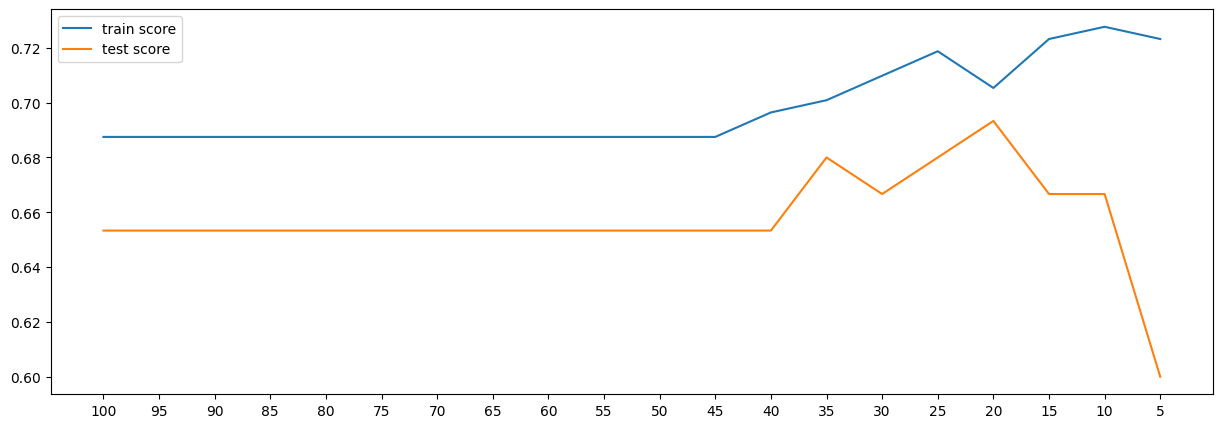

In [163]:
plt.figure(figsize=(15,5))
plt.plot(range(20), list_heart_train, label="train score")
plt.plot(range(20), list_heart_test, label="test score")
plt.legend()
plt.xticks(range(20), range(100, 1, -5))
plt.show()

In [86]:
def pre_model_data(df_train, df_test):
    model_hyper = KNeighborsClassifier(n_neighbors=10)
    model_dia = KNeighborsClassifier(n_neighbors=40)
    model_storke = KNeighborsClassifier(n_neighbors=15)
    model_heart = KNeighborsClassifier(n_neighbors=23)
    df_hyper = df_train[['age', 'sex', 'trestbps', 'chol']]
    
    model_hyper.fit()

In [87]:
model_hyper = KNeighborsClassifier(n_neighbors=10)
model_dia = KNeighborsClassifier(n_neighbors=40)
model_storke = KNeighborsClassifier(n_neighbors=15)
model_heart = KNeighborsClassifier(n_neighbors=23)

In [88]:
model_hyper.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [89]:
model_dia.fit(X_train_die, y_train_die)

KNeighborsClassifier(n_neighbors=40)

In [90]:
model_storke.fit(X_str_train, y_str_train)

KNeighborsClassifier(n_neighbors=15)

In [91]:
model_heart.fit(X_heart_train, y_heart_train)

KNeighborsClassifier(n_neighbors=23)

In [92]:
hyper_pre1 = model_hyper.predict(X1)
dia_pre1 = model_dia.predict(df_die2)
stroke = model_storke.predict(df111)
heart = model_heart.predict(df_sl123)

In [93]:
hyper_pre1, dia_pre1, stroke, heart

(array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [94]:
X_test, X_train

(        age  sex  trestbps  chol
 25528  64.0  1.0       130   245
 20861  63.0  0.0       125   249
 14168  51.0  0.0       130   256
 11849  55.0  1.0       160   234
 1639   58.0  0.0       145   282
 ...     ...  ...       ...   ...
 8226   50.0  1.0       148   203
 14195  42.0  0.0       165   289
 14086  28.0  1.0       100   234
 12034  58.0  1.0       120   284
 21436  53.0  0.0       140   308
 
 [6515 rows x 4 columns],
         age  sex  trestbps  chol
 20133  75.0  1.0       140   185
 10784  57.0  1.0       100   299
 6957   63.0  1.0       146   278
 12724  62.0  0.0       138   294
 7122   79.0  1.0       115   303
 ...     ...  ...       ...   ...
 25878  68.0  1.0       120   169
 4666   58.0  0.0       128   205
 18302  43.0  1.0       160   289
 24271  67.0  1.0       140   299
 17427  47.0  1.0        94   227
 
 [19543 rows x 4 columns])

In [95]:
import mysql.connector

In [96]:
def connect_to_mysql():
    db_config = {
        'host':'project-db-campus.smhrd.com',
        'port':3307,
        'user':'yeaha',
        'password':'1234',
        'database':'yeaha'
    }
    conn = mysql.connector.connect(**db_config)
    cursor = conn.cursor()
    return conn,cursor

def close_mysql_connection(conn, cursor):
    cursor.close()
    conn.close()

def execute_query(conn, cursor, query):
    try:
        cursor.execute(query)
        columns = [column[0] for column in cursor.description]
        results = []
        for row in cursor.fetchall():
            result_dict = dict(zip(columns, row))
            results.append(result_dict)
        return results
    except mysql.connector.Error as err:
        print(f"Error: {err}")

In [97]:
conn, cursor = connect_to_mysql()

try:
    query = "select * from tbl_product limit 1"
    result = execute_query(conn, cursor, query)
finally:
    close_mysql_connection(conn, cursor)

In [98]:
df_made = pd.DataFrame({
    'hyper_pre1': hyper_pre1,
    'dia_pre1': dia_pre1,
    'stroke': stroke,
    'heart': heart
})

In [99]:
df_made

,hyper_pre1,dia_pre1,stroke,heart
0,1,0,0,0
1,1,0,0,0
2,1,0,1,0
3,1,0,0,0
4,1,0,1,0
...,...,...,...,...
410568,1,0,0,0
410569,0,0,0,0
410570,1,0,0,0
410571,1,0,0,0


In [100]:
for i in df_made.iloc[0]:
    print(i)

1
0
0
0


In [101]:
hyper_fd = ['코엔자임', '오메가', '마그네슘', '칼륨', '비타민D']
dia_fd = ['알파리포산', '커피베리', '클로베타몰', '크로뮴', '오메가']
stroke_fd = ['비타민E', '비타민C', '마그네슘', '비타민D']
heart_fd = ['식이섬유', '비타민E', '비타민C']

In [102]:
def food_test(hyper_fd):
    list1 = []
    conn, cursor = connect_to_mysql()
    try:
        for i in hyper_fd:
            query = f"select prdlst_nm from tbl_product2 where rawmtrl_nm like '%{i}%'"
            result = execute_query(conn, cursor, query)
            list1.append(result)
    finally:
        close_mysql_connection(conn, cursor)
        return list1
    
def food_recommand(kwargs):
    food_name_list = []
    for i in kwargs:
        for j in i:
            val = list(j.values())[0]
            food_name_list.append(val)
    return list(set(food_name_list))

In [103]:
hyper111 = food_test(hyper_fd)
dia = food_test(dia_fd)
stroke = food_test(stroke_fd)
heart_fd = food_test(heart_fd)

In [104]:
hyper_set = food_recommand(hyper111)
dia_set = food_recommand(dia)
stroke_set = food_recommand(stroke)
heart_set = food_recommand(heart_fd)

heart_set

['코오롱츄어블비타민C옐로우비타',
 '키토산 패밀리 8',
 '고려홍삼골드플러스',
 '백년지기 홍삼액',
 '로우펫식이섬유플러스',
 '진스트15 앰플 플러스',
 '츄어블멀티비타민',
 '맛있는철분',
 '아르고 눈애존',
 '비타웰스',
 '본가(Bournga)(전량수출용)',
 '뉴참미인',
 '영양칼슘비타민',
 '멀티플렉스철분앤엽산',
 '올데이 난황레시틴플러스',
 '활력삼 캡슐',
 '노마츄정(튜티향)(합성튜티향 첨가)',
 '어덜트멀티비타민&미네랄',
 '웰파인다이어트식이섬유',
 '티세이칼슘',
 '한미멀티비타민',
 '웰빙홍삼',
 '글루코사민 플러스 오메가3',
 '에타무실골드',
 '유판씨뷰티비타',
 '아이러브유판씨',
 '원큐(식이섬유)',
 '사라의 미소',
 '단백질보충용파워프로틴2000',
 '플러스칼슘골드',
 '내몸에좋은비타민C와E 딸기맛',
 '에브리데이멀티비타민미네랄포우먼',
 '프라임멀티비타민앤미네랄',
 '한빛인제칼슘포르테비타민미네랄',
 '종합비타민골목대장',
 '헤라실버포우먼',
 '이뮨알파 플러스',
 '제우스실버포맨',
 '멀티비타민블루베리향',
 '진베이비앤키즈멀티플파우더',
 '유유칼디',
 '이눌린 쾌력',
 '맛있게씹어먹는철분',
 '옵티마마이헬스키드',
 '비타민C 밸런스업',
 '한빛칼슘골드',
 '홍삼멀티비타민&미네랄',
 '홍삼농축액캅셀골드',
 '보타닉화이버커피맛',
 '코오롱츄어블비타민C레드비타',
 '에너지 대사에 필요한 프로그램',
 '사포눌린',
 '비타헬스프리미엄',
 '앨트헬스 라이프업',
 '단백질보충용파워에그테인',
 '엑카실골드',
 '노마츄정(메론맛)',
 '칼슘골드',
 '활력삼',
 '내몸에좋은비타민 C와E, B2 레몬맛',
 '수다이어트',
 '홍삼력골드플러스캅셀홍삼성분',
 '조인트글루코사민',
 '닥터스뷰 하모니 포우먼',
 '멀티비타민미네랄프리미엄',
 '식이섬유화이버플러스',
 '화이버오렌지향',
 '단백질보충용파워시그마80',
 '뽀롱뽀롱 뽀로로 비타민C',
 

In [105]:
def recommand_sys(heart_set): 
    import random
    set1 = set()

    for i in range(0, 5):
        len1 = len(heart_set)
        index = random.randint(0, len1-1)
        set1.add(list(heart_set)[index])

    return set1

In [106]:
from PIL import Image
import pytesseract

In [107]:
from PIL import Image
import pytesseract

# Tesseract OCR에서 한글 언어를 사용하도록 설정
custom_config = r'--oem 3 --psm 6 outputbase nobatch -1 kor'

# 이미지 열기
image = Image.open('./1347805904153.jpg')

# Tesseract OCR을 사용하여 텍스트 추출
text = pytesseract.image_to_string(image, config=custom_config, lang='kor')

# 추출된 텍스트 출력
print(text)

성견     주므69버오
나의 검사결과 수치는?           :
바스 인의 기인 사는 인의 김시공과수치니디
구분 점사일환   결사황목        결사결과
(773       101 에/이19
개
비만    해태    널    00
계                    123.50-|
석       개죄지수   06     뼈     …
벼               …     버
사 | - 고에안     99 0 베     로 으으
'              2    19“
시카 이상           시려            원로 (07) | /오(08)
창가 미상    도     원쪽 (정상)  /오른똑 (정상)
빈혈 등    규셔소   르그   빼    께메
당뇨별    2909   2    펴    때에
.68여스64     빼   ~--뽀
더0000000~   ,     0 "
이상지질얼증           로     이
나      .으202142이드   버     려    " "페에
액 ㅣ - 동멍화      머    …     0]
도      10 때스크   뻐     리 …‥- 100태
사               *     …
만성신장질환 혈청324아닌    께       매메
.4619900   으   펴    때매
간장질환   시06900   1     려    그
결미지906 -09   뽀    1    깨메
요겸사 신장질환    요탄복       을성(정상)
영 상 | 폐걸랙 흘부질환 ㅣ @부빈사선리           전 상/ 비옹성 (정상)           ]
, , 20000   얼음   괴이치료여부   얼음
나09    양호    외싱및후유증   얼음
ㅣ 9반새터    양호    인지 장애   독이 소견 없음
99        대        948    마9616
건                            0067.00
령                            싱



In [108]:
one_line_text = ' '.join(text.replace('\n', '').split())
one_line_text

'성견 주므69버오나의 검사결과 수치는? :바스 인의 기인 사는 인의 김시공과수치니디구분 점사일환 결사황목 결사결과(773 101 에/이19개비만 해태 널 00계 123.50-|석 개죄지수 06 뼈 …벼 … 버사 | - 고에안 99 0 베 로 으으\' 2 19“시카 이상 시려 원로 (07) | /오(08)창가 미상 도 원쪽 (정상) /오른똑 (정상)빈혈 등 규셔소 르그 빼 께메당뇨별 2909 2 펴 때에.68여스64 빼 ~--뽀더0000000~ , 0 "이상지질얼증 로 이나 .으202142이드 버 려 " "페에액 ㅣ - 동멍화 머 … 0]도 10 때스크 뻐 리 …‥- 100태사 * …만성신장질환 혈청324아닌 께 매메.4619900 으 펴 때매간장질환 시06900 1 려 그결미지906 -09 뽀 1 깨메요겸사 신장질환 요탄복 을성(정상)영 상 | 폐걸랙 흘부질환 ㅣ @부빈사선리 전 상/ 비옹성 (정상) ], , 20000 얼음 괴이치료여부 얼음나09 양호 외싱및후유증 얼음ㅣ 9반새터 양호 인지 장애 독이 소견 없음99 대 948 마9616건 0067.00령 싱'

In [109]:
df_erg = pd.read_csv("./merge_data1/3년간 성별별 권장섭취량 기준 차이비율.csv", encoding='utf-8')

In [110]:
df_erg1 = df_erg.dropna()
df_erg1

,Unnamed: 0,성별,영양소,비율(%)_2019,비율(%)_2020,비율(%)_2021
0,0,남자,에너지,-0.8,-3.7,-6.1
1,1,남자,단백질,57.1,54.9,54.6
2,2,남자,콜레스테롤,6.2,5.8,2.2
3,3,남자,식이섬유,8.1,5.4,5.4
4,4,남자,칼슘,-31.8,-33.2,-31.4
5,5,남자,인,64.8,61.5,62.4
6,6,남자,나트륨,98.9,91.3,84.9
7,7,남자,칼륨,-14.7,-17.7,-17.3
8,8,남자,마그네슘,1.3,-2.2,-0.2
9,9,남자,철,5.5,4.6,8.9


In [111]:
df_erg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 39
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  38 non-null     int64  
 1   성별          38 non-null     object 
 2   영양소         38 non-null     object 
 3   비율(%)_2019  38 non-null     float64
 4   비율(%)_2020  38 non-null     float64
 5   비율(%)_2021  38 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.1+ KB


In [112]:
list_avg = []
for i in range(0, len(df_erg1)):
    sum1 = df_erg1.iloc[i]["비율(%)_2019":"비율(%)_2021"].sum()
    list_avg.append(sum1/3)

In [113]:
list_avg

[-3.5333333333333314,
 55.53333333333333,
 4.733333333333334,
 6.300000000000002,
 -32.13333333333333,
 62.900000000000006,
 91.7,
 -16.566666666666666,
 -0.3666666666666695,
 6.333333333333333,
 30.933333333333337,
 -40.699999999999996,
 -65.06666666666666,
 -30.26666666666667,
 21.566666666666666,
 32.23333333333334,
 -1.9333333333333325,
 -15.066666666666663,
 -23.799999999999997,
 -12.766666666666671,
 32.5,
 -23.366666666666664,
 4.199999999999998,
 -39.400000000000006,
 24.600000000000005,
 35.03333333333333,
 -32.53333333333333,
 -2.166666666666662,
 -26.366666666666664,
 16.333333333333332,
 -38.96666666666667,
 -72.0,
 -45.23333333333333,
 -4.699999999999998,
 25.23333333333333,
 -20.666666666666668,
 -30.033333333333342,
 -31.833333333333332]

In [114]:
df_erg1['avg'] = list_avg

C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\807426611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erg1['avg'] = list_avg


In [115]:
df_erg1

,Unnamed: 0,성별,영양소,비율(%)_2019,비율(%)_2020,비율(%)_2021,avg
0,0,남자,에너지,-0.8,-3.7,-6.1,-3.533333
1,1,남자,단백질,57.1,54.9,54.6,55.533333
2,2,남자,콜레스테롤,6.2,5.8,2.2,4.733333
3,3,남자,식이섬유,8.1,5.4,5.4,6.300000
4,4,남자,칼슘,-31.8,-33.2,-31.4,-32.133333
5,5,남자,인,64.8,61.5,62.4,62.900000
6,6,남자,나트륨,98.9,91.3,84.9,91.700000
7,7,남자,칼륨,-14.7,-17.7,-17.3,-16.566667
8,8,남자,마그네슘,1.3,-2.2,-0.2,-0.366667
9,9,남자,철,5.5,4.6,8.9,6.333333


In [116]:
df_erg1['영양소'].unique()

array(['에너지', '단백질', '콜레스테롤', '식이섬유', '칼슘', '인', '나트륨', '칼륨', '마그네슘', '철',
       '아연', '비타민A(RAE)', '비타민D', '비타민E', '티아민', '리보플라빈', '나이아신', '엽산',
       '비타민C'], dtype=object)

In [117]:
df_erg1[df_erg1['영양소'] == '에너지'][df_erg['성별'] == '남자']

C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\346761712.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_erg1[df_erg1['영양소'] == '에너지'][df_erg['성별'] == '남자']


,Unnamed: 0,성별,영양소,비율(%)_2019,비율(%)_2020,비율(%)_2021,avg
0,0,남자,에너지,-0.8,-3.7,-6.1,-3.533333


In [118]:
df_erg1[['남자', '여자']] = pd.get_dummies(df_erg1['성별'])
df_erg1

C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\1678603551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erg1[['남자', '여자']] = pd.get_dummies(df_erg1['성별'])
C:\Users\smhrd\AppData\Local\Temp\ipykernel_10288\1678603551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erg1[['남자', '여자']] = pd.get_dummies(df_erg1['성별'])


,Unnamed: 0,성별,영양소,비율(%)_2019,비율(%)_2020,비율(%)_2021,avg,남자,여자
0,0,남자,에너지,-0.8,-3.7,-6.1,-3.533333,1,0
1,1,남자,단백질,57.1,54.9,54.6,55.533333,1,0
2,2,남자,콜레스테롤,6.2,5.8,2.2,4.733333,1,0
3,3,남자,식이섬유,8.1,5.4,5.4,6.300000,1,0
4,4,남자,칼슘,-31.8,-33.2,-31.4,-32.133333,1,0
5,5,남자,인,64.8,61.5,62.4,62.900000,1,0
6,6,남자,나트륨,98.9,91.3,84.9,91.700000,1,0
7,7,남자,칼륨,-14.7,-17.7,-17.3,-16.566667,1,0
8,8,남자,마그네슘,1.3,-2.2,-0.2,-0.366667,1,0
9,9,남자,철,5.5,4.6,8.9,6.333333,1,0


In [119]:
df_dum = pd.get_dummies(df_erg1['영양소'])
df_erg1 = pd.concat([df_erg1, df_dum], axis=1)

In [120]:
m_random = RandomForestRegressor()

In [121]:
X_random = df_erg1.loc[:, '남자':'티아민']
y_random = df_erg1['avg']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_random, y_random, random_state=133)

In [123]:
m_random.fit(X_random, y_random)

RandomForestRegressor()

In [124]:
pre = m_random.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error

y_true = y_test
y_pred = pre

mse = mean_squared_error(y_true, y_pred)
mse

26.57437759999997

In [126]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
r2

0.8574056233849883

In [127]:
np.average(df_erg1['비율(%)_2019'])

-2.7921052631578944

In [128]:
data = pd.read_csv('./drop후데이터(97).csv', encoding='euc-kr')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PRDT_SHAP_CD_NM     6364 non-null   object
 1   PRDLST_NM           6364 non-null   object
 2   IFTKN_ATNT_MATR_CN  6364 non-null   object
 3   BSSH_NM             6364 non-null   object
 4   STDR_STND           6364 non-null   object
 5   DISPOS              6327 non-null   object
 6   PRIMARY_FNCLTY      6364 non-null   object
 7   POG_DAYCNT          6364 non-null   object
 8   CSTDY_MTHD          4699 non-null   object
 9   NTK_MTHD            6364 non-null   object
 10  RAWMTRL_NM          6364 non-null   object
dtypes: object(11)
memory usage: 547.0+ KB


In [130]:
test_age = '유아'
input_list = '알레르기'

conn, cursor = connect_to_mysql()

query = f"select prdlst_nm from tbl_product2 where not iftkn_atnt_matr_cn like '%{test_age}%' or iftkn_atnt_matr_cn like '%{input_list}%'"

result = execute_query(conn, cursor, query)

close_mysql_connection(conn, cursor)

df_made.iloc[0]['hyper_pre1']

1

In [131]:
# 제약조건을 추가하여 건강기능식품 추천하는 함수
def food_recommand_prdlst_nm(series, const1, const2):
# 파이썬 시리즈 형태, 제약조건이름1, 제약조건이름2
    if const1 == '':
        const1 = 'null'
    if const2 == '':
        const2 == 'null'
    list_res1 = [] # 빈 리스트에는 추천가능한 영양소가 들어감
    # 반복문 사용하여 어떤 병이 있는지 파악 -> 고혈압예측, 당뇨예측, 뇌졸중예측, 심장병예측순
    predict_list = ['hyper_pre1', 'dia_pre1', 'stroke', 'heart']
    
    hyper_fd = ['코엔자임', '오메가', '마그네슘', '칼륨', '비타민D']
    dia_fd = ['알파리포산', '커피베리', '클로베타몰', '크로뮴', '오메가']
    stroke_fd = ['비타민E', '비타민C', '마그네슘', '비타민D']
    heart_fd = ['식이섬유', '비타민E', '비타민C']
    index = 0
    for i in series:
        # 지금은 코딩으로 영양소데이터를 묶었지만 나중에는 데이터베이스에서 영양소 데이터 조회
        # 컬럼명을 질병명으로 통일 필요해보임.. 그리고 데이터베이스에는 영양소와 어떤 질병에 좋은지
        if series[i] == 1 and index == 0:
            list_res1.extend(hyper_fd)
        elif series[i] == 1 and index == 1:
            list_res1.extend(dia_fd)
        elif series[i] == 1 and index == 2:
            list_res1.extend(stroke_fd)
        elif series[i] == 1 and index == 3:
            list_res1.extend(heart_fd)
        index += 1
        
    list_result = list(set(list_res1))
    query_res = []
    # sql 탐색
    conn, cursor = connect_to_mysql()
    for k in list_result:
        query = f"select prdlst_nm from tbl_product2 where rawmtrl_nm like '%{k}%' and (NOT iftkn_atnt_matr_cn LIKE '%{const1}%' or not iftkn_atnt_matr_cn like '%{const2}%')"
        result = execute_query(conn, cursor, query)
        product_names = [item['prdlst_nm'] for item in result]
        query_res.extend(product_names)
    close_mysql_connection(conn, cursor)
    return list(set(query_res))

# 제약조건을 추가하여 건강기능식품 기능을 추출
def food_search(col_name, prd_name):
    list1 = []
    conn, cursor = connect_to_mysql()
    query = f"select {col_name} from tbl_product2 where prdlst_nm like '%{prd_name}%'"
    res = execute_query(conn, cursor, query)
    return res[0]

In [132]:
a = food_recommand_prdlst_nm(df_made.iloc[1], '유아', '알러지')
b = food_search('primary_fnclty', a[0])
a[1], b

('백년지기 홍삼액', {'primary_fnclty': '1. 콜레스테롤 개선'})

In [133]:
b

{'primary_fnclty': '1. 콜레스테롤 개선'}

In [134]:
result = [item.replace('\n', '') for item in b]
result = [item.replace('unmarked', '') for item in result]

In [135]:
a

['키토산 패밀리 8',
 '백년지기 홍삼액',
 '이온스칼슘',
 '맛있는철분',
 '슈퍼칼슘3골드',
 'BB Vite Plus(전량수출용)',
 '멀티플렉스철분앤엽산',
 '유판씨레드딸기맛',
 '선인삼성분골드',
 '건국패밀리생유산균',
 '안당삼(安糖蔘)',
 '보령뉴셀렉스',
 '뽀롱뽀롱 뽀로로 멀티비타민',
 '한빛인제칼슘포르테비타민미네랄',
 '비타민미네랄 큐로',
 '옵티키즈정',
 '제우스실버포맨',
 '파이토플라본',
 '와우 플러스(Wow Plus)',
 '멀티비타민앤미네랄 포 패밀리',
 '채움 후',
 '옵티마마이헬스키드',
 '샤크플러스칼슘',
 '비타헬스프리미엄',
 '데일리밸런스',
 '셀렌이스트라민',
 '엑카실골드',
 '고려홍삼정(錠)',
 '멀티비타민미네랄프리미엄',
 '화이버오렌지향',
 '모닝큐화이버27',
 '미네랄칼슘포르테',
 '웰빙글루코사민',
 'FBL멀티비타민앤미네랄',
 '메가톤 KIDS(전량수출용)',
 '멀티비타민칼슘',
 '신데렐라 아큐비타민C',
 '한미오메가3EPA/DHA',
 '식이섬유화이버립',
 '페디오징크정',
 '아이누리 비타D 400IU',
 '콘솔에프식이섬유',
 '프리미엄 밀크씨슬 플러스',
 '식이섬유화이버올',
 '칼슘골드 오리지널',
 '스타옥타코사놀',
 '이엔지키토산',
 '뷰티케어와이',
 '화이바프리미엄골드',
 '식이섬유 골드',
 '온가족츄어블멀티비타민&미네랄',
 '이롬비타민C',
 '지근억비피더스',
 '코오롱츄어블비타민C블루비타',
 '화진글루코사민골드',
 '웰빙혼합유산균(수출명:Rofit)',
 '헬스감마리놀렌산',
 'PME-88멜론SOD정',
 '인성비타민골드',
 '한미멜론SOD',
 '내몸에 조은 멀티비타민',
 '츄어블칼슘플러스',
 '츄어블해조칼슘',
 '코오롱츄어블비타민C옐로우비타',
 '칼슘마그네슘아연+비타민C,D',
 '고려홍삼골드플러스',
 '로우펫식이섬유플러스',
 '뉴참미인',
 '영양칼슘비타민',
 '아이브라이트 플러스',
 '모세 리얼

In [136]:
result

['primary_fnclty']

In [137]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [138]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\smhrd\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [139]:
predictions = model(X_test[:1]).numpy()
predictions

array([[0.08355386, 0.15751486, 0.0657334 , 0.0763762 , 0.05530111,
        0.10866275, 0.08730907, 0.11668152, 0.1159001 , 0.13296716]],
      dtype=float32)

In [140]:
a = tf.nn.softmax(predictions).numpy()

In [141]:
data_list = [0, 1, 1 ,0]

data_series = pd.Series(data_list)
list_food1 = food_recommand_prdlst_nm(data_series, '', '')
food_search('primary_fnclty', list_food1[1])

{'primary_fnclty': '[비타민C]①결합조직 형성과 기능유지에 필요②철의 흡수에 필요③유해산소로부터 세포를 보호하는데 필요\n[철]①체내 산소운반과 혈액생성에 필요②에너지 생성에 필요'}

In [142]:
basic_food = pd.read_csv("./basic_food_csv_file.csv")

In [143]:
basic_food_dropna = basic_food.dropna()

In [144]:
basic_food_dropna

,진단과,질병명,영양소
0,내과,혈행,rtg오메가 혈행
1,내과,비만,bnr17
2,내과,고혈압,폴리코사놀
3,내과,당뇨,바나나잎
4,내과,고지혈증,폴리코사놀
5,내과,"위염 ,위궤양",메스틱
6,내과,변비,바이오사이든
7,내과,감기,리포좀 비타민c
8,내과,빈혈,마그네슘
9,내과,지방간,밀크시슬


In [145]:
product_list = pd.read_csv("./product_list_file.csv")

In [146]:
product_list

,건강부위,이름,효능
0,장건강(건강기능식품),프로바이오틱스 10억 CFU아연 2.55mg(30%),1. 유산균 증식 및 유해균 억제〮배변활동 원활〮장 건강에 도움을 줄 수 있음.2....
1,장건강 디톡,바이오사이든지아이디톡스,배변활동 원활〮장 건강에 도움을 줄 수 있음.
2,눈건강(건강기능식품),"루테인 (마리골드추출물 20mg)아스타잔틴 (헤마토코쿠스추출물 4mg)오메가3 ,차즈기",1. 노화로 인해 감소될 수 있는 황반색소밀도를 유지하여 눈 건강에 도움을 줄 수 ...
3,혈행 및 눈건강 (건강기능식품),EPA 및 DHA 함유 유지(EPA〮DHA의 합) 500mg차즈기,1. 혈중 중성지질 개선〮혈행 개선에 도움을 줄 수 있음.2. 혈중 콜레스테롤 개선...
4,혈압 고지혈증(건강기능식품),폴리코사놀 . 코엔자임큐텐,혈중 콜레스테롤 개선에 도움을 줄 수 있음.
5,위건강 (건강기능식품),매스틱,위건강에 도움을 줄수 있음
6,피부건강(건강기능식품),히알루론산 120mg콜라겐,1. 피부보습에 도움을 줄 수 있음.
7,항산화(건강기능식품),코엔자임Q10 100mg비타민C 100mg(100%)비타민E 11mg ∝-TE(10...,1.항산화〮높은 혈압 감소에 도움을 줄 수 있음.2. 결합조직 형성과 기능유지에 필...
8,전립선건강(건강기능식품),옥타코사놀함유유지 (옥타코사놀) 20mg쏘팔메토열매추출물 (로르산) 115mg아연 ...,1. 전립선 건강의 유지에 도움을 줄 수 있음.2. 지구력 증진에 도움을 줄 수 있...
9,간건강(건강기능식품),밀크씨슬추출물(실리마린 130mg),1. 간 건강에 도움을 줄 수 있음.


In [156]:
def mentor_data_recommand(series):
    
    
    recommand_list = []
    
    # 'hyper_pre1', 'dia_pre1', 'stroke', 'heart'
    test_dis_list = ['고혈압', '당뇨', '뇌졸중', '심장병']
    
    # 받아온 시리즈 데이터 1 인 자리의 질병이름만 추출
    selected_diseases = [disease for disease, value in zip(test_dis_list, series) if value == 1]
    
    # 질병명을 통해 필요한 영양소가 무엇인지 추출
    conn, cursor = connect_to_mysql()
    
    dis_name_list = []
    # 질병명과 영양소 가져오기
    # 재사용할땐 질병명이 필요할수도있으니..
    for d in selected_diseases:
        query = f"select 질병명, 영양소 from tbl_mentor_disease where 질병명 LIKE '%{d}%'"
        res = execute_query(conn, cursor, query)
        dis_name_list.extend(res)
    
    # 영양소만 분리
    nutrient_list = []
    for j in dis_name_list:
        nutrient_list.append(j['영양소'].replace(" ", ''))
    
    # 제약조건 chat-GPT 연동 통해서 추가
    from openai import OpenAI
    client = OpenAI(api_key="api키 입력")
    
    
    # 건강기능식품추천
    index=0
    for k in nutrient_list:
        text = k
        completion = client.chat.completions.create(model='gpt-3.5-turbo', messages=[{"role": "user", "content": f"{text}이랑 먹으면 안좋은 영양소 한개만 말해줘 대답하지말고 한단어만 출력해줘"}])
        avoid = completion.choices[0].message.content
        query = f"select prdlst_nm from tbl_product2 where rawmtrl_nm like '%{k}%' and rawmtrl_nm not like '%{avoid}%'"
        res = execute_query(conn, cursor, query)
        recommand_list.extend(res)

    close_mysql_connection(conn,cursor)
    
    if len(recommand_list) == 0:
        return "오류 발생으로 다시 테스트해주세요"
    else:
        values = [item['prdlst_nm'] for item in recommand_list]
        return list(set(values))

In [172]:
mentor_data_recommand(df_made.iloc[15])[0:3]

['이온스칼슘', '맛있는철분', '슈퍼칼슘3골드']

In [149]:
res1 = {}
res1['이름'] = '폴리코사놀'
res1['이름'].split('.')

['폴리코사놀']

In [150]:
new = pd.Series([1] * 4)

In [151]:

from openai import OpenAI

client = OpenAI(api_key="api키 입력")

text = '칼슘'
completion = client.chat.completions.create(model='gpt-3.5-turbo', messages=[{"role": "user", "content": f"{text}이랑 먹으면 안좋은 영양소 한개만 말해줘 대답하지말고 한단어만 출력해줘"}])

completion.choices[0].message.content

'철분'

In [152]:
result("칼슘")

TypeError: 'list' object is not callable